# Problem Set 2

All imports

In [1]:
import math
import matplotlib.pyplot as plt

## Question 1A

Make necessary list(s)

In [5]:
# Different starting allele frequencies for allele A
allele_A_freqs = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
gen1_long_list = []
# Possible numbers of A allele
num_A = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
# Probabilities from Wright-Fisher Model
wfm_list = []
# Frequency of allele A in generation 2
allele_A_gen2_freq = []
# Change in allele frequencies
delta_A = []
# Gen 1 - Delta f(A) and Gen 1 + Delta f(A)
gen_min_delA = []
gen_plus_delA = []

Make necessary variable(s)

In [6]:
# Variable to represent number of alleles
allele_count = 20

Calculate the number of combinations for n choose x

In [7]:
def calc_combinations(n, x):
    combinations = math.factorial(n)/((math.factorial(x))*(math.factorial(n-x)))
    return combinations

Calculate Wright-Fisher Model probabilities

In [9]:
for freq in allele_A_freqs:
    for i in num_A:
        possible_combinations = calc_combinations(allele_count, i)
        wfm = possible_combinations * (freq**i) * ((1-freq)**(allele_count - i))
        wfm_list.append(wfm)

Determine frequency of allele A in generation 2

In [10]:
increments = 1/allele_count
i = -0.05
while i <= 1:
    i += increments
    allele_A_gen2_freq.append(round(i, 2))

Determine change in f(A)

In [11]:
for gen1 in allele_A_freqs:
    for gen2 in allele_A_gen2_freq:
        delta = abs(gen2 - gen1)
        delta_A.append(round(delta, 2))

Determine possible changes in allele frequencies

In [12]:
# Expand allele_A_freqs list entries to make long list for math operations
for gen1 in allele_A_freqs:
    gen1_long_list.extend([gen1, gen1, gen1, gen1, gen1, gen1, gen1, gen1, gen1, gen1, gen1, gen1, gen1, gen1, gen1, gen1, gen1, gen1, gen1, gen1, ])

# Make f(A) in Generation 1 +/- delta f(A) lists
zip_object = zip(gen1_long_list, delta_A)
for gen1_long_list_i, delta_A_i in zip_object:
    gen_min_delA.append(round((gen1_long_list_i - delta_A_i), 2))
    gen_plus_delA.append(round((gen1_long_list_i + delta_A_i), 2))

Give up here because I don't know how to code the probability matching. I shifted to Excel for the matching and then took the final data to make the list to generate the scatter plot.

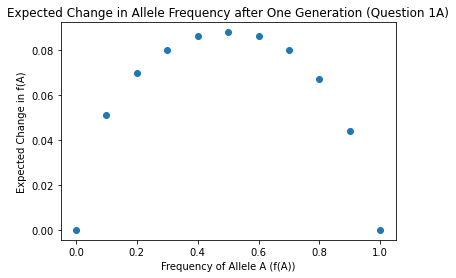

In [14]:
# Generate a scatter plot to show expected change in allele frequency after one generation
# Expected change in allele frequencies (from Excel sheet)
y = [0, 0.051332365, 0.069823809, 0.080248996, 0.086244153, 0.088098526, 0.086237203, 0.080025259, 0.067164503, 0.044150059, 0]

plt.scatter(allele_A_freqs, y)
plt.title('Expected Change in Allele Frequency after One Generation (Question 1A)')
plt.xlabel('Frequency of Allele A (f(A))')
plt.ylabel('Expected Change in f(A)')
plt.show()

## Question 1B

Make necessary list(s)

In [15]:
# Make a list for population size
pop_size = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
# Make a list for expected change in allele frequency after one generation
expected_delta_A = [0.123046875, 0.088097572, 0.072232224, 0.062685344, 0.056137586, 0.051289087, 0.047512737, 0.044463939, 0.041935561, 0.039794619]

I just did the work in Excel following the same steps as in Question 1A, but plotted the scatter plot using the code below.

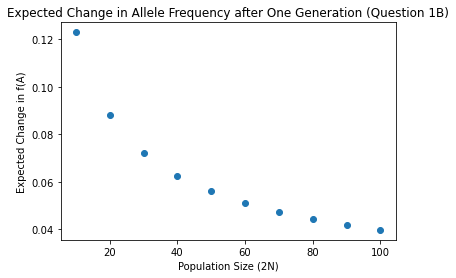

In [16]:
plt.scatter(pop_size, expected_delta_A)
plt.title('Expected Change in Allele Frequency after One Generation (Question 1B)')
plt.xlabel('Population Size (2N)')
plt.ylabel('Expected Change in f(A)')
plt.show()

## Question 3

Make necessary list(s)

In [17]:
# Make a list for number of gene copies
gene_copies = []
# Make a list for coalescent event values (3.1)
coal_event = []
# Make a list for generations to MRCA for all gene copies (3.2)
mrca = []
# Make a list for total tree length (3.3)
ttl = []

Question 3.1

In [18]:
for i in range(2,51):
    gene_copies.append(i)

for copy in gene_copies:
    value = 2/((copy*(copy-1))/2)
    coal_event.append(value)

Question 3.2

In [19]:
initial = 0

for copy in gene_copies:
    i = (2/((copy*(copy-1))/2))
    initial += i
    mrca.append(initial)

Question 3.3

In [20]:
init = 0

for copy in gene_copies:
    i = (2/((copy*(copy-1))/2)) * copy
    init += i
    ttl.append(init)

Make the scatter plot for all the data

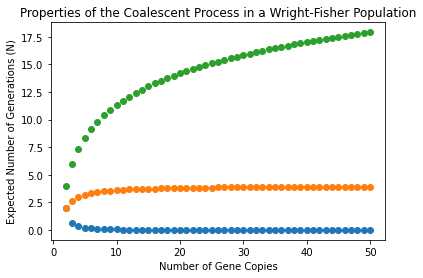

In [21]:
# Generate a scatter plot to show the time to first coalescent event 
plt.scatter(gene_copies, coal_event)
# Generate a scatter plot to show the time to first coalescent event 
plt.scatter(gene_copies, mrca)
# Generate a scatter plot to show everything from Problem 3.1-3.3 
plt.scatter(gene_copies, ttl)

plt.title('Properties of the Coalescent Process in a Wright-Fisher Population')
plt.xlabel('Number of Gene Copies')
plt.ylabel('Expected Number of Generations (N)')
plt.show()